In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import scipy.linalg as sla

# Sistema de ecuaciones

Un sistema de ecuaciones es un conjunto de ecuaciones algebraicas que deben satisfacerse simultáneamente. Generalmente, un sistema de ecuaciones lineales consta de ecuaciones de la forma:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n &= b_1, \\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n &= b_2, \\
\vdots \quad & \quad \vdots \\
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n &= b_m,
\end{aligned}
$$

donde:
- $x_1, x_2, \dots, x_n$ son las incógnitas del sistema,
- $a_{ij}$ son los coeficientes de las incógnitas,
- $b_i$ son los términos independientes,
- $m$ es el número de ecuaciones, y $n$ es el número de incógnitas.

### Representación matricial

Este sistema puede escribirse de manera compacta utilizando la notación matricial como:

$$
A\mathbf{x} = \mathbf{b},
$$

donde:
- $A$ es la **matriz de coeficientes** de tamaño $m \times n$:
  $$
  A = \begin{bmatrix}
  a_{11} & a_{12} & \cdots & a_{1n} \\
  a_{21} & a_{22} & \cdots & a_{2n} \\
  \vdots & \vdots & \ddots & \vdots \\
  a_{m1} & a_{m2} & \cdots & a_{mn}
  \end{bmatrix},
  $$
- $\mathbf{x}$ es el **vector de incógnitas** de tamaño $n \times 1$:
  $$
  \mathbf{x} = \begin{bmatrix}
  x_1 \\
  x_2 \\
  \vdots \\
  x_n
  \end{bmatrix},
  $$
- $\mathbf{b}$ es el **vector de términos independientes** de tamaño $m \times 1$:
  $$
  \mathbf{b} = \begin{bmatrix}
  b_1 \\
  b_2 \\
  \vdots \\
  b_m
  \end{bmatrix}.
  $$



Usando Algebra matricial, podemos encontrar una solución para las incognitas $\mathbf{x}$

Sea

$$
A\mathbf{x} = \mathbf{b},
$$

Luego,

$$
A^{-1}A\mathbf{x} = A^{-1}\mathbf{b},
$$

Finalmente

$$
\mathbf{x} = A^{-1}\mathbf{b},
$$


### Ejemplo

Para un sistema de dos ecuaciones con dos incógnitas:
$$
\begin{aligned}
2x_1 + 3x_2 &= 5, \\
4x_1 - x_2 &= 6,
\end{aligned}
$$
la forma matricial es:
$$
\begin{bmatrix}
2 & 3 \\
4 & -1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
5 \\
6
\end{bmatrix}.
$$

Esta notación es especialmente útil para resolver sistemas utilizando métodos algebraicos (como eliminación de Gauss o descomposición LU) o computacionales.

In [ ]:
A = np.array([[2, 3], [4, -1]])
b = np.array([5, 6])

x = la.inv(A) @ b
x

array([1.64285714, 0.57142857])

# Solución de sistemas de ecuaciones 'pequeños'

## Graficamente

Consideremos el siguiente sistema de ecuaciones:

$$
\begin{cases}
a_1 x_1 + b_1 x_2 = c_1 \\
a_2 x_1 + b_2 x_2 = c_2
\end{cases}
$$

Donde $a_1$, $b_1$, $c_1$, $a_2$, $b_2$ y $c_2$ son constantes.

Despejando para $x_2$ en (1) tenemos que:

$$
x_2 =  - \frac{a_1}{b_1} x_2 + \frac{c_1}{b_1}
$$

Que tiene la forma de una recta con pendiente $\frac{a_1}{b_1}$ e intercepto $\frac{c_1}{b_1}$.

Para $x_2$ tendremos


$$
x_2 =  - \frac{a_2}{b_2} x_1 + \frac{c_2}{b_2}
$$

Que tiene la forma de una recta con pendiente $\frac{a_2}{b_2}$ e intercepto $\frac{c_2}{b_2}$. Por lo tanto la intercepción entre estas rectas nos dará la solución al sistema.





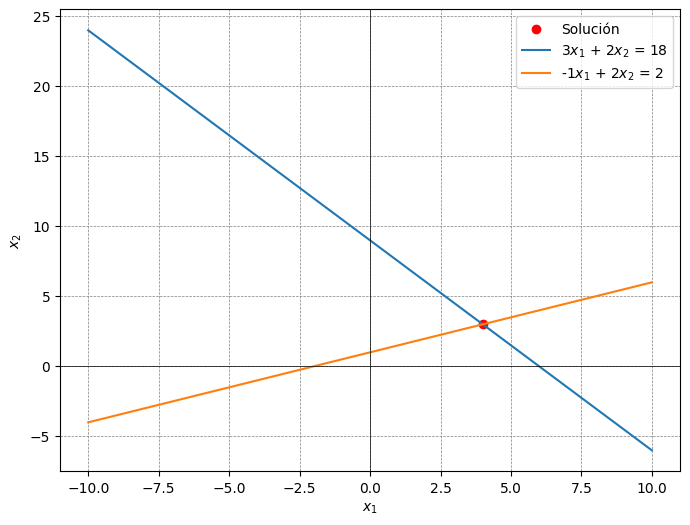

In [ ]:
# Definimos las constantes
a1, b1, c1 = 3, 2, 18
a2, b2, c2 = -1, 2, 2

sol = np.linalg.solve(np.array([[a1, b1], [a2, b2]]), np.array([c1, c2]))


# Valores para las líneas
x = np.linspace(-10, 10, 400)
y1 = (c1 - a1 * x) / b1
y2 = (c2 - a2 * x) / b2

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(sol[0], sol[1], color='red', label='Solución')
plt.plot(x, y1, label=f'{a1}$x_1$ + {b1}$x_2$ = {c1}')
plt.plot(x, y2, label=f'{a2}$x_1$ + {b2}$x_2$ = {c2}')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

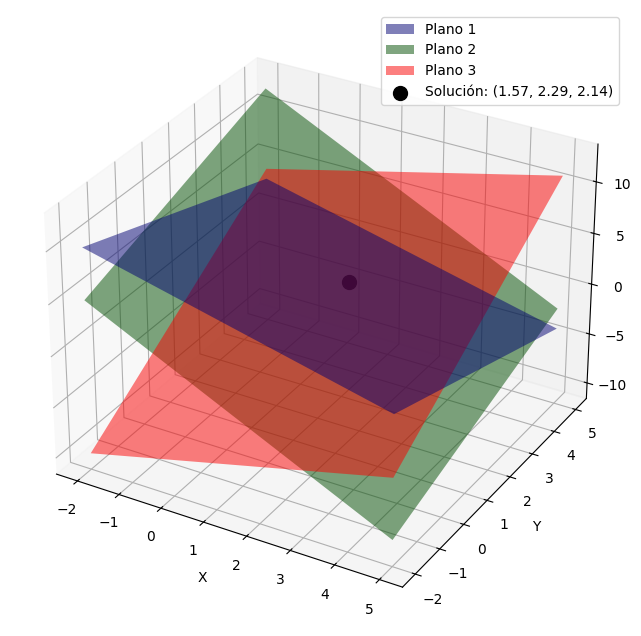

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definición del sistema de ecuaciones
A = np.array([[1, 1, 1],
              [2, -1, 1],
              [1, 2, -1]])
b = np.array([6, 3, 4])

# Resolver el sistema
solution = np.linalg.solve(A, b)
x, y, z = solution

# Crear una malla de puntos para graficar los planos
x_vals = np.linspace(-2, 5, 100)
y_vals = np.linspace(-2, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Ecuaciones de los planos
Z1 = 6 - X - Y  # Plano 1: x + y + z = 6
Z2 = 3 - 2*X + Y  # Plano 2: 2x - y + z = 3
Z3 = X + 2*Y - 4  # Plano 3: x + 2y - z = 4

# Crear la gráfica
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los planos
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='Plano 1')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='green', label='Plano 2')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='red', label='Plano 3')

# Marcar el punto de intersección
ax.scatter(x, y, z, color='black', s=100, label=f'Solución: ({x:.2f}, {y:.2f}, {z:.2f})')

# Configuración de la gráfica
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Mostrar la gráfica
plt.show()


## Regla de Cramer para resolver sistemas de ecuaciones lineales

La **regla de Cramer** es un método algebraico para resolver sistemas de ecuaciones lineales cuadradas. Se utiliza determinantes para calcular las soluciones de un sistema de ecuaciones de la forma general:

$$
A \cdot \mathbf{x} = \mathbf{b}
$$

donde:
- $A$ es la matriz de coeficientes (de dimensión $n \times n$),
- $\mathbf{x}$ es el vector columna de incógnitas, es decir, $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$,
- $\mathbf{b}$ es el vector columna de términos independientes, es decir, $\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{bmatrix}$.

### Fórmula general de la regla de Cramer

La solución para cada incógnita $x_i$ del sistema se obtiene mediante el siguiente determinante:

$$
x_i = \frac{\det(A_i)}{\det(A)}
$$

donde:
- $\det(A)$ es el determinante de la matriz de coeficientes $A$,
- $\det(A_i)$ es el determinante de la matriz $A_i$, que se obtiene reemplazando la columna $i$ de la matriz $A$ por el vector $\mathbf{b}$.

### Pasos para calcular cada $x_i$:
1. **Matriz de coeficientes $A$**:
   La matriz $A$ tiene la forma:

   $$
   A = \begin{bmatrix}
   a_{11} & a_{12} & \cdots & a_{1n} \\
   a_{21} & a_{22} & \cdots & a_{2n} \\
   \vdots & \vdots & \ddots & \vdots \\
   a_{n1} & a_{n2} & \cdots & a_{nn}
   \end{bmatrix}
   $$

2. **Matrices $A_i$**:
   Para cada incógnita $x_i$, se reemplaza la columna $i$ de la matriz $A$ por el vector $\mathbf{b}$, es decir:

   $$
   A_i = \begin{bmatrix}
   a_{11} & \cdots & b_1 & \cdots & a_{1n} \\
   a_{21} & \cdots & b_2 & \cdots & a_{2n} \\
   \vdots & \vdots & \vdots & \vdots & \vdots \\
   a_{n1} & \cdots & b_n & \cdots & a_{nn}
   \end{bmatrix}
   $$

3. **Solución para $x_i$**:
   La solución para cada $x_i$ se calcula como:

   $$
   x_i = \frac{\det(A_i)}{\det(A)}
   $$

Para el siguiente sistema:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 &= b_1 \\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 &= b_2 \\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 &= b_3
\end{aligned}
$$

La solución será:

$$
x_1 = \frac{\det(A_1)}{\det(A)}, \quad
x_2 = \frac{\det(A_2)}{\det(A)}, \quad
x_3 = \frac{\det(A_3)}{\det(A)}
$$

donde $A_1$, $A_2$ y $A_3$ son las matrices obtenidas al sustituir la primera, segunda y tercera columna de $A$ por el vector $\mathbf{b}$, respectivamente.

### Condición de existencia de la solución
Este método solo es válido cuando el determinante de la matriz $A$ es diferente de cero:

$$
\det(A) \neq 0
$$

Si $\det(A) = 0$, el sistema puede no tener solución o tener infinitas soluciones.


### Ejemplo

Resolver el sistema:
$$
\begin{aligned}
2x_1 + 3x_2 &= 5, \\
4x_1 - x_2 &= 6.
\end{aligned}
$$

#### Paso 1: Matriz de coeficientes y $\mathbf{b}$
La matriz de coeficientes $A$ y el vector $\mathbf{b}$ son:
$$
A = \begin{bmatrix}
2 & 3 \\
4 & -1
\end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix}
5 \\
6
\end{bmatrix}.
$$

#### Paso 2: Determinante de $A$
Calculamos:
$$
\det(A) = \begin{vmatrix}
2 & 3 \\
4 & -1
\end{vmatrix} = (2)(-1) - (4)(3) = -2 - 12 = -14.
$$

#### Paso 3: Construir $A_1$ y $A_2$
- Para $x_1$, reemplazamos la primera columna de $A$ por $\mathbf{b}$:
  $$
  A_1 = \begin{bmatrix}
  5 & 3 \\
  6 & -1
  \end{bmatrix}.
  $$
- Para $x_2$, reemplazamos la segunda columna de $A$ por $\mathbf{b}$:
  $$
  A_2 = \begin{bmatrix}
  2 & 5 \\
  4 & 6
  \end{bmatrix}.
  $$

#### Paso 4: Calcular $\det(A_1)$ y $\det(A_2)$
- Determinante de $A_1$:
  $$
  \det(A_1) = \begin{vmatrix}
  5 & 3 \\
  6 & -1
  \end{vmatrix} = (5)(-1) - (6)(3) = -5 - 18 = -23.
  $$
- Determinante de $A_2$:
  $$
  \det(A_2) = \begin{vmatrix}
  2 & 5 \\
  4 & 6
  \end{vmatrix} = (2)(6) - (4)(5) = 12 - 20 = -8.
  $$

#### Paso 5: Calcular $x_1$ y $x_2$
Usamos la regla de Cramer:
$$
x_1 = \frac{\det(A_1)}{\det(A)} = \frac{-23}{-14} = \frac{23}{14},
$$
$$
x_2 = \frac{\det(A_2)}{\det(A)} = \frac{-8}{-14} = \frac{4}{7}.
$$

### Solución
El sistema tiene solución única:
$$
x_1 = \frac{23}{14}, \quad x_2 = \frac{4}{7}.
$$

In [ ]:
A = np.array([[2, 3], [4, -1]])
b = np.array([5, 6])

det_A = la.det(A)

A_1 = np.array([[5, 3], [6, -1]])
det_A_1 = la.det(A_1)

A_2 = np.array([[2, 5], [4, 6]])
det_A_2 = la.det(A_2)

sol_1 = det_A_1 / det_A
sol_2 = det_A_2 / det_A


print(f'El valor de x_1 es: {sol_1}')
print(f'El valor de x_2 es: {sol_2}')

El valor de x_1 es: 1.6428571428571423
El valor de x_2 es: 0.5714285714285712


In [ ]:
#@title Regla de Cramer
def regla_de_cramer(A, b):
    """
    Resuelve un sistema de ecuaciones lineales utilizando la regla de Cramer.

    Parámetros:
    - A: Matriz de coeficientes (numpy array de tamaño n x n).
    - b: Vector de términos independientes (numpy array de tamaño n).

    Retorna:
    - Vector solución (numpy array de tamaño n) si el sistema tiene solución única.
    - Mensaje de error si el determinante de A es 0.
    """
    # Calcular el determinante de la matriz de coeficientes
    det_A = np.linalg.det(A)

    if np.isclose(det_A, 0):
        return "El sistema no tiene solución única, ya que det(A) = 0."

    n = A.shape[0]  # Número de incógnitas
    soluciones = np.zeros(n)  # Vector para almacenar las soluciones

    # Iterar sobre cada incógnita
    for i in range(n):
        # Crear una copia de A y reemplazar la columna i por b
        Ai = A.copy()
        Ai[:, i] = b
        # Calcular el determinante de Ai
        det_Ai = np.linalg.det(Ai)
        # Calcular la solución para x_i
        soluciones[i] = det_Ai / det_A

    return soluciones

In [ ]:
regla_de_cramer(A, b)

array([1.64285714, 0.57142857])

## Eliminación de Gauss simple

La **eliminación de Gauss** es un método algebraico utilizado para resolver sistemas de ecuaciones lineales. Este proceso consiste en transformar el sistema de ecuaciones en un sistema equivalente más sencillo utilizando operaciones elementales sobre las filas de la matriz aumentada del sistema, con el objetivo de llevarla a una forma escalonada. Una vez que el sistema se encuentra en esta forma, es más fácil encontrar las soluciones utilizando sustitución hacia atrás.

El objetivo de la eliminación de Gauss es transformar la matriz del sistema en una **matriz triangular superior** (o escalonada), de modo que sea más fácil resolver el sistema mediante sustitución hacia atrás.


Dado un sistema de ecuaciones lineales representado por una matriz aumentada:

$$
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & b_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn} & b_m \\
\end{bmatrix}
$$

El objetivo es transformar esta matriz en una forma triangular superior, donde los elementos debajo de la diagonal principal sean cero. Esto se hace realizando operaciones sobre las filas de la matriz.



## Transformación a Matriz Triangular Superior

El objetivo es convertir el sistema $A\mathbf{x} = \mathbf{b}$ en un sistema equivalente $U\mathbf{x} = \mathbf{b}'$, donde $U$ es una matriz triangular superior.

### Eliminación de Elementos Debajo del Pivote

Para cada fila $i$, hacemos ceros en los elementos de las filas inferiores $j > i$ en la columna $i$.

El factor de eliminación se calcula como:

$$
m_{ji} = \frac{a_{ji}}{a_{ii}}
$$

Luego, actualizamos cada elemento de la fila $j$ como:

$$
a_{jk} \leftarrow a_{jk} - m_{ji} \cdot a_{ik}, \quad \text{para} \quad k = i, \dots, n
$$

Y actualizamos el término independiente correspondiente:

$$
b_j \leftarrow b_j - m_{ji} \cdot b_i
$$

Este proceso se repite para cada fila hasta obtener la matriz triangular superior $U$.

## Sustitución Hacia Atrás

Una vez que $A$ ha sido transformada en $U$, resolvemos el sistema $U\mathbf{x} = \mathbf{b}'$ utilizando sustitución hacia atrás.

1. Para la última incógnita $x_n$:

$$
x_n = \frac{b'_n}{u_{nn}}
$$

2. Para las demás incógnitas $x_i$, se resuelve de forma iterativa hacia atrás:

$$
x_i = \frac{b'_i - \sum_{j=i+1}^n u_{ij} x_j}{u_{ii}}
$$

## Matriz Triangularizada

El resultado de la eliminación gaussiana es una matriz triangular superior $U$ de la forma:

$$
U =
\begin{bmatrix}
u_{11} & u_{12} & \cdots & u_{1n} \\
0 & u_{22} & \cdots & u_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & u_{nn}
\end{bmatrix}
$$

Y un vector transformado $b'$.



### Ejemplo

Consideremos el siguiente sistema de ecuaciones lineales:

$$
\begin{aligned}
x + 2y + 3z &= 9, \\
2x + 3y + z &= 8, \\
3x + y + 2z &= 7.
\end{aligned}
$$

Esto se puede representar en una matriz aumentada de la siguiente manera:

$$
\begin{bmatrix}
1 & 2 & 3 & 9 \\
2 & 3 & 1 & 8 \\
3 & 1 & 2 & 7
\end{bmatrix}
$$

#### Paso 1: Hacer que el primer elemento de la primera columna sea 1

El primer elemento ya es 1, por lo que no se requiere ninguna operación en este caso.

#### Paso 2: Hacer ceros debajo del primer elemento (en la primera columna)

Restamos el doble de la primera fila a la segunda fila y restamos tres veces la primera fila a la tercera fila:

- Fila 2: $F_2 \rightarrow F_2 - 2F_1$
- Fila 3: $F_3 \rightarrow F_3 - 3F_1$

Esto da la siguiente matriz:

$$
\begin{bmatrix}
1 & 2 & 3 & 9 \\
0 & -1 & -5 & -10 \\
0 & -5 & -7 & -20
\end{bmatrix}
$$

#### Paso 3: Hacer que el segundo elemento de la segunda columna sea 1

Multiplicamos la segunda fila por $-1$ para hacer que el segundo elemento de la segunda columna sea 1:

- Fila 2: $F_2 \rightarrow -F_2$

Esto da la siguiente matriz:

$$
\begin{bmatrix}
1 & 2 & 3 & 9 \\
0 & 1 & 5 & 10 \\
0 & -5 & -7 & -20
\end{bmatrix}
$$

#### Paso 4: Hacer ceros debajo del segundo elemento (en la segunda columna)

Sumamos 5 veces la segunda fila a la tercera fila para eliminar el elemento en la tercera fila, segunda columna:

- Fila 3: $F_3 \rightarrow F_3 + 5F_2$

Esto da la siguiente matriz:

$$
\begin{bmatrix}
1 & 2 & 3 & 9 \\
0 & 1 & 5 & 10 \\
0 & 0 & 18 & 30
\end{bmatrix}
$$

#### Paso 5: Hacer que el tercer elemento de la tercera columna sea 1

Dividimos la tercera fila por 18:

- Fila 3: $F_3 \rightarrow \frac{1}{18} F_3$

Esto da la siguiente matriz escalonada superior:

$$
\begin{bmatrix}
1 & 2 & 3 & 9 \\
0 & 1 & 5 & 10 \\
0 & 0 & 1 & \frac{5}{3}
\end{bmatrix}
$$

#### Paso 6: Sustitución hacia atrás

Ahora que tenemos la matriz en forma escalonada superior, podemos resolver el sistema utilizando sustitución hacia atrás:

1. De la última fila, obtenemos:
   $$ z = \frac{5}{3} $$

2. Sustituyendo $z$ en la segunda fila:
   $$ y + 5z = 10 \quad \Rightarrow \quad y + 5\left(\frac{5}{3}\right) = 10 \quad \Rightarrow \quad y = \frac{5}{3} $$

3. Sustituyendo $y$ y $z$ en la primera fila:
   $$ x + 2y + 3z = 9 \quad \Rightarrow \quad x + 2\left(\frac{5}{3}\right) + 3\left(\frac{5}{3}\right) = 9 \quad \Rightarrow \quad x = \frac{2}{3} $$

### Solución final:

Por lo tanto, la solución del sistema es:

$$
x = \frac{2}{3}, \quad y = \frac{5}{3}, \quad z = \frac{5}{3}
$$




In [ ]:
#@title Eliminación de Gauss
def eliminacion_gauss_simple(A, b):
    # Crear la matriz aumentada
    aug_matrix = np.c_[A, b]  # Combinar A y b en la matriz aumentada

    n = len(A)  # Número de ecuaciones

    # Fase de eliminación
    for i in range(n):
        if np.isclose(aug_matrix[i, i], 0):  # Verificar si el pivote es cercano a 0
            raise ValueError("El método falla: pivote cero encontrado. Considere el pivoteo.")

        for j in range(i + 1, n):
            if aug_matrix[j, i] != 0:  # Si el valor no es cero
                factor = aug_matrix[j, i] / aug_matrix[i, i]
                aug_matrix[j, i:] -= factor * aug_matrix[i, i:]  # Operaciones vectorizadas

    # Fase de sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (aug_matrix[i, -1] - np.dot(aug_matrix[i, i + 1:n], x[i + 1:])) / aug_matrix[i, i]

    return aug_matrix, x





In [ ]:
A = np.array([
    [1, 2, 3],
    [2, 3, 1],
    [3, 1, 2]
])

b = np.array([9, 8, 7])

#eliminacion_gauss_simple(A, b)

np.c_[A,b]

array([[1, 2, 3, 9],
       [2, 3, 1, 8],
       [3, 1, 2, 7]])

# Error por redondeo en la Eliminación Gaussiana

Definimos $\epsilon = 2^{-52} \approx 2.2 \times 10^{-16} $, conocido como el *machine epsilon*, es decir, la distancia entre 1 y el siguiente número más grande representable en la computadora. En aritmética de computadoras, recordemos que:

$$ 2 + \epsilon = 2, \quad 4 - \epsilon = 4. $$

Ahora, consideremos el sistema de ecuaciones:

$$
\begin{aligned}
\epsilon x_1 + 2x_2 &= 4, \\
x_1 - x_2 &= 1.
\end{aligned}
$$

Dado que $ \epsilon \ll 1 $, una aproximación cercana a la solución se puede encontrar con:

$$ x_2 = 2, \quad x_1 = 3. $$

Eliminación Gaussiana sobre la matriz aumentada sin intercambios de filas (conocido como *pivoteo parcial*):

$$
\begin{bmatrix}
\epsilon & 2 & 4 \\
1 & -1 & 1
\end{bmatrix}
\to
\begin{bmatrix}
\epsilon & 2 & 4 \\
0 & -\frac{2}{\epsilon} & -\frac{4}{\epsilon} + 1
\end{bmatrix}.
$$


$$
x_2 = \frac{-\frac{4}{\epsilon} + 1}{-\frac{2}{\epsilon} - 1} = \frac{4 - \epsilon}{2 + \epsilon} = 2, \quad
x_1 = \frac{4 - 2x_2}{\epsilon} = \frac{4 - 4}{\epsilon} = 0.
$$

El resultado para $ x_1 $ es incorrecto (se obtiene $ 0 $ en lugar de $ 3 $). Podemos identificar el origen del error al resolver el problema de manera exacta:

$$
x_1 = \frac{4 - 2x_2}{\epsilon} = \frac{4 - 2\left(\frac{4 - \epsilon}{2 + \epsilon}\right)}{\epsilon} = \frac{6\epsilon}{\epsilon(2 + \epsilon)} = \frac{6}{2 + \epsilon} \approx 3.
$$


En el cálculo exacto, $ x_2 $ es ligeramente menor que $ 2 $, y una resta entre dos números casi idénticos lleva al resultado correcto. Sin embargo, los errores de redondeo, dados por $ 4 - \epsilon = 4 $ y $ 2 + \epsilon = 2 $, causan que el cálculo sea completamente incorrecto.




In [ ]:

epsilon_maquina = np.finfo(float).eps
2 + epsilon_maquina, 4 - epsilon_maquina

(2.0, 4.0)

# Método de Pivoteo Parcial en Eliminación Gaussiana


 El **pivoteo parcial** se utiliza para mejorar la estabilidad numérica del algoritmo, evitando la división por números pequeños que pueden causar errores de redondeo.

### Selección del Pivote

Para cada columna $ i $, seleccionamos el valor absoluto más grande en la subcolumna que aún no ha sido escalonada. Este valor se convierte en el **pivote**:

$$
\max_{row} = \arg\max \left| a_{ij} \right| \quad \text{para} \quad j = i, \dots, n
$$

### Intercambio de Filas

Si el pivote no está en la fila $ i $, intercambiamos las filas $ i $ y $ \max_{row} $. Esto se realiza para asegurar que el pivote es el valor más grande en valor absoluto y evitar divisiones problemáticas.

### Eliminación hacia Adelante

Una vez que hemos seleccionado el pivote, usamos este valor para hacer ceros debajo de él en la columna $ i $ mediante las siguientes operaciones:

$$
a_{ij} \leftarrow a_{ij} - \frac{a_{ij}}{a_{ii}} \cdot a_{ik} \quad \text{para} \quad j > i
$$

### Repetir el Proceso

Este proceso de selección del pivote, intercambio de filas y eliminación hacia adelante se repite para cada columna $ i $ hasta que la matriz se convierte en una **matriz triangular superior**.

### Sustitución Hacia Atrás

Una vez obtenida la matriz triangular superior, se resuelve el sistema utilizando sustitución hacia atrás. Para una fila $ i $, la solución es:

$$
x_i = \frac{b_i - \sum_{j=i+1}^n a_{ij} x_j}{a_{ii}}
$$

Esto se hace comenzando desde la última fila hacia la primera.



Consideremos el siguiente sistema de ecuaciones:

$$
\begin{aligned}
2x_1 - x_2 + x_3 &= 1, \\
3x_1 + 3x_2 + 9x_3 &= 0, \\
3x_1 + 3x_2 + 5x_3 &= 4.
\end{aligned}
$$

La matriz aumentada correspondiente es:

$$
\begin{bmatrix}
2 & -1 & 1 & 1 \\
3 & 3 & 9 & 0 \\
3 & 3 & 5 & 4
\end{bmatrix}
$$

*Selección del Pivote*

En la primera columna, el valor más grande es $ 3 $. Intercambiamos la fila 1 con la fila 2:

$$
\begin{bmatrix}
3 & 3 & 9 & 0 \\
2 & -1 & 1 & 1 \\
3 & 3 & 5 & 4
\end{bmatrix}
$$

*Eliminación hacia Adelante*

Restamos $ \frac{2}{3} $ de la fila 1 de la fila 2, y restamos $ 1 $ de la fila 1 de la fila 3:

$$
\begin{bmatrix}
3 & 3 & 9 & 0 \\
0 & -3 & -5 & 1 \\
0 & 0 & -4 & 4
\end{bmatrix}
$$

*Paso 3: Sustitución Hacia Atrás*

Una vez obtenida la matriz triangular superior, realizamos la sustitución hacia atrás.

- Para $ x_3 $:

$$
x_3 = \frac{4}{-4} = -1
$$

- Para $ x_2 $:

$$
-3x_2 - 5(-1) = 1 \quad \Rightarrow \quad x_2 = \frac{4}{3}
$$

- Para $ x_1 $:

$$
3x_1 + 3(-2) + 9(-1) = 0 \quad \Rightarrow \quad x_1 = \frac{5}{3}
$$



La solución del sistema es:

$$
x_1 = \frac{5}{3}, \quad x_2 = \frac{4}{3}, \quad x_3 = -1
$$


In [ ]:
#@title Pivoteo
def eliminacion_gaussiana_pivoteo(A, b):
    """
    Resolución de un sistema de ecuaciones mediante eliminación gaussiana con pivoteo parcial.

    Parámetros:
        A (numpy.ndarray): Matriz de coeficientes (n x n).
        b (numpy.ndarray): Vector de términos independientes (n x 1).

    Retorna:
        numpy.ndarray: Solución del sistema (x).
        numpy.ndarray: Matriz aumentada escalonada.
    """
    # Convertimos A y b a tipo float
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float).reshape(-1, 1)
    n = len(A)

    # Creación de la matriz aumentada
    aug_matrix = np.c_[A, b]

    # Eliminación con pivoteo parcial
    for i in range(n):
        # Encontrar el índice del mayor elemento en la columna actual (para pivoteo)
        max_row = np.argmax(abs(aug_matrix[i:, i])) + i

        # Intercambiar filas si es necesario
        if max_row != i:
            aug_matrix[[i, max_row]] = aug_matrix[[max_row, i]]

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            factor = aug_matrix[j, i] / aug_matrix[i, i]
            aug_matrix[j, i:] -= factor * aug_matrix[i, i:]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (aug_matrix[i, -1] - np.dot(aug_matrix[i, i+1:n], x[i+1:])) / aug_matrix[i, i]

    return aug_matrix, x


In [ ]:
A = np.array([
    [2, -1, 1],
    [3, 3, 9],
    [3, 3, 5]
])

b = np.array([1, 0, 4])

eliminacion_gaussiana_pivoteo(A,b)

(array([[ 3.,  3.,  9.,  0.],
        [ 0., -3., -5.,  1.],
        [ 0.,  0., -4.,  4.]]),
 array([ 1.66666667,  1.33333333, -1.        ]))

In [ ]:
#la.solve(A,b)
sla.solve(A,b)

array([ 1.66666667,  1.33333333, -1.        ])

# Eliminación Gaussiana para Determinantes e Inversas

## 1. Cálculo del Determinante

El determinante de una matriz cuadrada $A$ puede calcularse usando eliminación gaussiana al triangularizarla en una matriz superior $U$. Las consideraciones clave son:

- **Intercambio de filas:** Cambia el signo del determinante.
- **Multiplicación de una fila por un escalar:** Escala el determinante en el mismo factor.
- **Suma de múltiplos de filas:** No altera el determinante.

### Fórmula:

Si $A \to U$ es el resultado de la eliminación gaussiana con $p$ intercambios de filas, entonces:

$$
\det(A) = (-1)^p \cdot \prod_{i=1}^n u_{ii}
$$

donde $u_{ii}$ son los elementos diagonales de la matriz triangular superior $U$.

---

## 2. Cálculo de la Inversa

La matriz inversa $A^{-1}$ se calcula resolviendo $n$ sistemas de ecuaciones lineales del tipo:

$$
A \mathbf{x}_i = \mathbf{e}_i
$$

donde $\mathbf{e}_i$ son los vectores columna de la identidad. Esto se puede realizar utilizando eliminación gaussiana en una matriz aumentada.

### Pasos:

1. Formar la matriz aumentada $[A \,|\, I]$, donde $I$ es la matriz identidad.
2. Aplicar eliminación gaussiana para transformar $A$ en la identidad:
   $$
   [A \,|\, I] \to [I \,|\, A^{-1}]
   $$
3. La parte derecha de la matriz resultante es la inversa $A^{-1}$.

---

## Ejemplo 1: Determinante

Dada la matriz:

$$
A =
\begin{bmatrix}
2 & 1 & 1 \\
4 & -6 & 0 \\
-2 & 7 & 2
\end{bmatrix}
$$

1. Aplicamos eliminación gaussiana para obtener la matriz triangular superior:

$$
U =
\begin{bmatrix}
2 & 1 & 1 \\
0 & -8 & -2 \\
0 & 0 & -1
\end{bmatrix}
$$

2. No hubo intercambios de filas, así que $p = 0$.

3. El determinante es:

$$
\det(A) = \prod_{i=1}^3 u_{ii} = 2 \cdot (-8) \cdot (-1) = 16
$$

---

## Ejemplo 2: Inversa

Dada la misma matriz $A$, concatenamos con la identidad:

$$
[A \,|\, I] =
\begin{bmatrix}
2 & 1 & 1 & 1 & 0 & 0 \\
4 & -6 & 0 & 0 & 1 & 0 \\
-2 & 7 & 2 & 0 & 0 & 1
\end{bmatrix}
$$

1. Aplicamos eliminación gaussiana para transformar $A$ en la identidad. El resultado es:

$$
[I \,|\, A^{-1}] =
\begin{bmatrix}
1 & 0 & 0 & 0.75 & -0.3125 & -0.375 \\
0 & 1 & 0 & 0.5 & -0.375 & -0.25 \\
0 & 0 & 1 & -1 & 1 & 1
\end{bmatrix}
$$

2. La matriz inversa es:

$$
A^{-1} =
\begin{bmatrix}
0.75 & -0.3125 & -0.375 \\
0.5 & -0.375 & -0.25 \\
-1 & 1 & 1
\end{bmatrix}
$$

---



In [ ]:
A = np.array([
    [2, 1, 1],
    [4, -6, 0],
    [-2, 7, 2]
])

la.det(A)

-15.999999999999998

In [ ]:
la.solve(A,b)

array([-0.75, -0.5 ,  3.  ])

In [ ]:
la.inv(A)

array([[ 0.75  , -0.3125, -0.375 ],
       [ 0.5   , -0.375 , -0.25  ],
       [-1.    ,  1.    ,  1.    ]])

# **Eficiencia computacional de la eliminación gaussiana**

Para analizar la eficiencia computacional de la eliminación gaussiana, consideremos las operaciones necesarias para transformar la matriz $A$ en una matriz triangular superior $U$. Este proceso involucra dos etapas principales:

1. **Reducción a forma triangular superior**.
2. **Sustitución hacia atrás** para encontrar el vector solución $\mathbf{x}$.

### **1. Reducción a forma triangular superior**

La eliminación gaussiana requiere eliminar los elementos por debajo de la diagonal principal, trabajando por columnas. En la $k$-ésima iteración, se realizan las siguientes operaciones:

- Para cada fila $i > k$, actualizar la fila restando un múltiplo de la fila pivote:
  $$
  a_{ij} \leftarrow a_{ij} - l_{ik}a_{kj}, \quad \text{donde } l_{ik} = \frac{a_{ik}}{a_{kk}}.
  $$

Esto implica:

- **$n-k$ filas** por actualizar.
- **$n-k$ columnas** afectadas por fila.

El número total de operaciones en la $k$-ésima iteración es proporcional a:

$$
(n-k)(n-k).
$$

Sumando sobre todas las iteraciones ($k=1$ a $k=n-1$), el costo total de la reducción es:

$$
\sum_{k=1}^{n-1} (n-k)^2 = \sum_{k=1}^{n-1} (n^2 - 2nk + k^2).
$$

Resolviendo esta suma:

- $\sum_{k=1}^{n-1} n^2 = n^2(n-1)$,
- $\sum_{k=1}^{n-1} -2nk = -2n\frac{(n-1)n}{2} = -n^2(n-1)$,
- $\sum_{k=1}^{n-1} k^2 = \frac{(n-1)n(2n-1)}{6}$.

El término dominante es $n^3/3$, lo que significa que la complejidad para esta etapa es **$\mathcal{O}(n^3)$**.

---

### **2. Sustitución hacia atrás**

En esta etapa, resolvemos el sistema triangular superior $U\mathbf{x} = \mathbf{y}$ mediante sustitución hacia atrás. Para cada ecuación, calculamos:

$$
x_i = \frac{1}{u_{ii}} \left( y_i - \sum_{j=i+1}^{n} u_{ij}x_j \right).
$$

Esto requiere:

- Para la ecuación $i$, $\mathcal{O}(n-i)$ operaciones.

Sumando sobre todas las filas:

$$
\sum_{i=1}^{n} (n-i) = \frac{n(n-1)}{2}.
$$

El costo de esta etapa es **$\mathcal{O}(n^2)$**, menor que el de la etapa de reducción.

---

## **Costo total**

El costo total de la eliminación gaussiana es dominado por la etapa de reducción a triangular superior, es decir:

$$
\text{Costo total} = \mathcal{O}(n^3).
$$

---

## **Comparación con otros métodos**

1. **Factorización LU**: Similar a la eliminación gaussiana, pero permite resolver múltiples sistemas $A\mathbf{x} = \mathbf{b}_i$ con distintos $\mathbf{b}_i$ más eficientemente, ya que el costo adicional para cada sistema es $\mathcal{O}(n^2)$.
2. **Métodos iterativos** (como Jacobi o Gauss-Seidel): Son más eficientes para matrices dispersas, pero su convergencia depende de las propiedades de la matriz.

---
